# <center>Barry Bonds: Hall of Famer or Fraud?

<center><img src="barrybonds.jpeg"/></center>

### <center> Aryan Das
### <center> December 2022

# Introduction

Barry Bonds is an American former professional baseball player who played 22 seasons in Major League Baseball (MLB). He is widely considered to be one of the greatest baseball players of all time. Bonds was a member of the Pittsburgh Pirates (1986-1992) and the San Francisco Giants (1993-2007). 

The Pittsburgh Pirates selected Bonds with the sixth overall pick in the 1985 Major League Baseball draft, and he spent 1986-1992 with the Pirates. In his six years with the Pirates, Bonds won two Most Valuable Player (MVP) awards and had already established himself as one of the best players in the league. In 1993, Bonds left the Pirates to sign a lucrative free agent contract with the San Francisco Giants. The Giants are the same team his father, Bobby Bonds, played for as well as Bonds' godfather, Willie Mays. At the time, this deal was the largest in baseball history. With the Giants, Bonds would go on to win another five MVPs. In his career, along with his ridiculous seven total NL MVP awards, Bonds earned a cumulative 12 Silver Slugger awards, eight Gold Glove awards, 14 All-Star selections, led MLB in on-base plus slugging (OPS), was a top five hitter in 12 of his 17 qualifying seasons, and break a number of all-time career records, including all-time home runs (762), single season home runs (73), and all-time walks. Additionally, Bonds ranks second in career Wins Above Replacement (WAR) among all major league players, behind Babe Ruth.

Given the above information, any person with reasonable cognitive abilities would consider Barry Bonds as a candidate for induction into the National Baseball Hall of Fame, right? Well, despite Bonds' accolades, he actually led a controversial career, most notably as the central figure in the MLB steroid scandal. During the time when Bonds played, there were a number of players using steroids, which is why this era when Bonds played is literally called the "steroid era" of baseball. Between 1998 and 2009, 10 players reached 500 career home runs, and of the 10 players, six (Barry Bonds, Alex Rodriguez, Mark McGwire, Manny Ramirez, Rafael Palmeiro and Gary Sheffield) have all been linked to steroids or some sort of performance enhacing drug (PED). The story behind the Barry Bonds steroid scandal is covered extensively in a book written by Mark Fainaru-Wada and Lance Williams, reporters for the San Francisco Chronicle, called *Game of Shadows*. 

Just this past year, in his final year on the hall of fame ballot, Bonds failed yet again to reach the 75% of the votes needed to be inducted. This means that officially, Barry Bonds is not a member of the National Baseball Hall of Fame and never will be. 

What do I want to want to show? Good question. I want to show you that **Barry Bonds, if you take out the years where he was using steroids, is still a player that deserves to be a member of the National Baseball Hall of Fame.**

## Facts

I briefly touched upon how distinguished Barry Bonds is as a player as a whole, but I want to focus specifically on his pre steroid (I will refer to this period at time throughout as the 'pre-juice' period) career. Bonds is reported to have started using steroid in 1998, but did not really see the affects for about a year, so we will consider the pre-juice period every year from his rookie year up until 1998 (inclusive). Up to 1998, here is what Bonds had accomplished:

<ul>
    <li> 9x MLB All-Star Selections</li>
    <li> 8x Rawlings Gold Glove Awards</li>
    <li> 7x Silver Slugger Awards</li>
    <li> 4x Adjusted OPS+ NL Leader</li>
    <li> 5x Base on Balls NL Leader</li>
    <li> 1x Home Run NL Leader</li>
    <li> 7x Intentional Base on Ball NL Leader</li>
    <li> 4x OBP (On-base percentage) NL Leader</li>
    <li> 5x OPS (On-base plus slugging) NL Leader</li>
    <li> 1x RBI (Runs batted in) NL Leader</li>
    <li> 3x SLG (Slugging) NL Leader</li>
</ul>


The point I am trying to make is, even without going through the data science pipeline, you can probably tell this man is insanely good at baseball and was well on his way to getting into the National Baseball Hall of Fame.

# Data Collection

The dataset I am using is "Lahman's Baseball Database." There are various tables within this database and I will pull data from the tables that I find are relevant. After getting all of the tables into dataframes using pandas read csv function, I want to make some dataframes that I can actually do some data analysis with. My goal in this step is to create some dataframes that are ready for analysis. Additionally, I can pull data using the sqlite version too by using python's sql capabilities.

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm

In [2]:
path = './baseballdatabank-2022.2'
sql_file = 'lahmansbaseballdb.sqlite'
conn = sqlite3.connect(sql_file)
batting = pd.read_csv(path + '/core' + '/Batting.csv')
pitching = pd.read_csv(path + '/core' + '/Pitching.csv')
fielding = pd.read_csv(path + '/core' + '/Fielding.csv')
teams = pd.read_csv(path + '/core' + '/Teams.csv')
allstars = pd.read_csv(path + '/core' + '/AllStarFull.csv')
appearances = pd.read_csv(path + '/core' + '/Appearances.csv')
battingpost = pd.read_csv(path + '/core' + '/BattingPost.csv')
people = pd.read_csv(path + '/core' + '/People.csv')
salaries = pd.read_csv(path + '/contrib' + '/Salaries.csv')
halloffame = pd.read_csv(path + '/contrib' + '/HallOfFame.csv')

I pulled all of these csv tables in as dataframes because I was honestly unsure about what I wanted to do for this project. All I knew was that I wanted to use this awesome source of baseball data. After examining and messing around with some of the tables, I decided I want to do this specific topic which this project is based upon. I found that applying certain data cleaning procedures are much easier through SQL queries than multiple lines of python code. It is always a good idea to choose the solution that will take less time in general, after all.

In [3]:
# Hall of fame player query. Making sure we only grab the players who were inducted 
# by the BBWAA. 
HOF_query = '''
SELECT 
    playerID,
    ballots, 
    votes 
FROM HallOfFame 
WHERE votedBy="BBWAA" AND inducted="Y"
'''

# Getting the carreer batting statistics for every player, summing 
# all the major hatting categories to get career numbers in each of those areas plus stolen bases
batting_reg_query = '''
SELECT 
    playerID, 
    SUM(H), 
    SUM(AB), 
    SUM(HR),
    SUM([2B]), 
    SUM([3B]),
    SUM(BB),
    SUM(HBP), 
    SUM(SB) 
FROM Batting 
GROUP BY playerID
'''

# Pre steroid use batting stats for Bonds. I found it easier and less code to 
# just pull his stats in a SQL query rather than go through the massive table 
# in python
clean_batting_query = '''
SELECT
    playerID,
    SUM(H) AS total_hits,
    SUM(AB),
    SUM(HR),
    SUM([2B]),
    SUM([3B]),
    SUM(BB),
    SUM(HBP),
    SUM(SB)
FROM Batting
WHERE playerID = 'bondsba01' AND yearID < 1999
GROUP BY playerID
'''

# Pre steroid use fielding stats for Bonds. I found it easier and less code to 
# just pull his stats in a SQL query rather than go through the massive table 
# in python
clean_fielding_query = '''
SELECT 
    playerID, 
    Pos, 
    SUM(G), 
    SUM(PO), 
    SUM(A), 
    SUM(E) 
FROM Fielding 
WHERE playerID = 'bondsba01' AND yearID < 1999
GROUP BY playerID
'''

# Getting career statistics for all the major fielding categories, along with their playerID and position. 
fielding_reg_query = '''
SELECT 
    playerID, 
    Pos, 
    SUM(G), 
    SUM(PO), 
    SUM(A), 
    SUM(E) 
FROM Fielding 
GROUP BY playerID
'''
# Reading the SQL to create dataframes
reg_batting = pd.read_sql(batting_reg_query, conn)
reg_fielding = pd.read_sql(fielding_reg_query, conn)
hallOfFame = pd.read_sql(HOF_query,conn)
barry_hitting_clean = pd.read_sql(clean_batting_query, conn)
barry_fielding_clean = pd.read_sql(clean_fielding_query, conn)

In [4]:
print(halloffame.columns)
print(batting.columns)
print(fielding.columns)
print(people.columns)

Index(['playerID', 'yearID', 'votedBy', 'ballots', 'needed', 'votes',
       'inducted', 'category', 'needed_note'],
      dtype='object')
Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')
Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS', 'ZR'],
      dtype='object')
Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')


I want to find out the player id for Barry Bonds. I can find this out by iterating over the people dataframe

In [5]:
for i in range(len(people)):
    curr = people.loc[i, 'nameLast']
    if curr == 'Bonds':
        print(people.loc[i, 'playerID'])

bondsba01
bondsbo01


There are two players in MLB history with the last name Bonds: Barry Bonds and Bobby Bonds. Obviously, Barry Bonds has the player id: bondsba01. Now that we know Bonds' player id, we can gather all of his stats from the tables that I pulled from the database above.

In [6]:
barry = "bondsba01"

bondsbatting = batting.loc[batting['playerID'] == barry]
bondsfielding = fielding.loc[fielding['playerID'] == barry]

bondsbatting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
63336,bondsba01,1986,1,PIT,NL,113,413,72,92,26,...,48.0,36.0,7.0,65,102.0,2.0,2.0,2.0,2.0,4.0
64352,bondsba01,1987,1,PIT,NL,150,551,99,144,34,...,59.0,32.0,10.0,54,88.0,3.0,3.0,0.0,3.0,4.0
65408,bondsba01,1988,1,PIT,NL,144,538,97,152,30,...,58.0,17.0,11.0,72,82.0,14.0,2.0,0.0,2.0,3.0
66455,bondsba01,1989,1,PIT,NL,159,580,96,144,34,...,58.0,32.0,10.0,93,93.0,22.0,1.0,1.0,4.0,9.0
67523,bondsba01,1990,1,PIT,NL,151,519,104,156,32,...,114.0,52.0,13.0,93,83.0,15.0,3.0,0.0,6.0,8.0
68639,bondsba01,1991,1,PIT,NL,153,510,95,149,28,...,116.0,43.0,13.0,107,73.0,25.0,4.0,0.0,13.0,8.0
69723,bondsba01,1992,1,PIT,NL,140,473,109,147,36,...,103.0,39.0,8.0,127,69.0,32.0,5.0,0.0,7.0,9.0
70794,bondsba01,1993,1,SFN,NL,159,539,129,181,38,...,123.0,29.0,12.0,126,79.0,43.0,2.0,0.0,7.0,11.0
71952,bondsba01,1994,1,SFN,NL,112,391,89,122,18,...,81.0,29.0,9.0,74,43.0,18.0,6.0,0.0,3.0,3.0
73017,bondsba01,1995,1,SFN,NL,144,506,109,149,30,...,104.0,31.0,10.0,120,83.0,22.0,5.0,0.0,4.0,12.0


In [7]:
barry_career = reg_batting.loc[reg_batting['playerID'] == barry]
barry_career.columns = ['playerID','H','AB','HR','DBL','TPL','BB','HBP','SB']
barry_career

,playerID,H,AB,HR,DBL,TPL,BB,HBP,SB
1621,bondsba01,2935,9847,762,601,77,2558,106.0,514.0


Due to the fact Barry Bonds used steroids which did in fact allow him to put up insane hitting numbers later on into his career around the same time where most players decline, I will completely exclude every year where he was supossedly using steroids. After doing some research, it does appear that Bonds' steroid use began in 1998, so I will exclude every season after 1998. 

Here is every season Bonds played before 1999, so all of his 'clean' years:

In [8]:
barry_clean = pd.merge(barry_fielding_clean, barry_hitting_clean, on=['playerID'])
barry_clean.columns = ['playerID','POS','G','PO','A','E','H','AB','HR','DBL','TPL','BB','HBP','SB']
barry_clean

,playerID,POS,G,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,bondsba01,OF,1864,3900,125,64,1917,6621,411,403,63,1357,50,445


In [9]:
before_batting_avg = barry_clean['H'][0] / barry_clean['AB'][0]
seasons = 1999-1986

print('Pre-Juice Batting Avg: ', before_batting_avg)
print('Pre-Juice RBI per season: ', sum(bondsbatting.loc[bondsbatting['yearID'] < 1999]['RBI']) / seasons)
print('Pre-Juice HRs per season: ', sum(bondsbatting.loc[bondsbatting['yearID'] < 1999]['HR']) / seasons)

Pre-Juice Batting Avg:  0.28953330312641595
Pre-Juice RBI per season:  93.53846153846153
Pre-Juice HRs per season:  31.615384615384617


And just for fun, here are his insane seasonal number when he started using steroids... 

It is funny how he missed a full season due to injury late in his career and his seasonal averages are still as ridiculous as they are.

In [10]:
after_batting_avg = (barry_career['H'][1621] - barry_clean['H'][0]) / (barry_career['AB'][1621] - barry_clean['AB'][0])
seasons = 2007-1998
print('Post-Juice Batting Avg: ', after_batting_avg)
print('Post-Juice RBI per season: ', sum(bondsbatting.loc[bondsbatting['yearID'] >= 1999]['RBI']) / seasons)
print('Post-Juice HRs per season: ', sum(bondsbatting.loc[bondsbatting['yearID'] >= 1999]['HR']) / seasons)

Post-Juice Batting Avg:  0.3155610663360198
Post-Juice RBI per season:  86.66666666666667
Post-Juice HRs per season:  39.0


I have the hall of fame data which shows every member of the baseball hall of fame, but I need to remove some fields that I do not need for analysis. I also want to create a field that shows the percentage of votes you need to get in, since you need at least 75% of votes needed to be inducted.

In [11]:
halloffame.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [12]:
halloffame['vote_pct'] = halloffame['votes'] / halloffame['ballots'] * 100
print(len(halloffame))
halloffame = halloffame.loc[halloffame['votedBy'] == 'BBWAA']
halloffame = halloffame.loc[halloffame['category'] == 'Player']
halloffame = halloffame.loc[halloffame['inducted'] == 'Y']
halloffame.drop(['votes', 'ballots', 'needed_note', 'votedBy', 'category', 'needed', 'inducted'], axis=1, inplace=True)
halloffame.head()

4191


,playerID,yearID,vote_pct
0,cobbty01,1936,98.230088
1,ruthba01,1936,95.132743
2,wagneho01,1936,95.132743
3,mathech01,1936,90.707965
4,johnswa01,1936,83.628319


Going back to the fielding and hitting data, I just want to consolidate these two tables into one table that has all important stats for every baseball player.

In [13]:
reg_stats = pd.merge(reg_fielding, reg_batting, on=['playerID'])
reg_stats.columns = ['playerID','POS','G','PO','A','E','H','AB','HR','DBL','TPL','BB','HBP','SB']
reg_stats

,playerID,POS,G,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,aardsda01,P,331,11,29,3.0,0,4,0,0,0,0,0.0,0.0
1,aaronha01,OF,3020,7436,429,144.0,3771,12364,755,624,98,1402,32.0,240.0
2,aaronto01,1B,387,1317,113,22.0,216,944,13,42,6,86,0.0,9.0
3,aasedo01,P,448,67,135,13.0,0,5,0,0,0,0,0.0,0.0
4,abadan01,1B,9,37,1,1.0,2,21,0,0,0,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19486,zupofr01,C,13,31,1,2.0,3,18,0,1,0,2,0.0,0.0
19487,zuvelpa01,SS,201,267,415,23.0,109,491,2,17,2,34,2.0,2.0
19488,zuverge01,P,265,45,145,7.0,21,142,0,2,1,9,0.0,0.0
19489,zwilldu01,OF,342,755,37,25.0,364,1280,30,76,15,128,4.0,46.0


We ultimately would like to see the stats of current hall of fame members and compare them to Barry Bonds' stats, so I would like a table that has every hall of famer matched with their respective career stats.

In [14]:
reg_HOF_stats = pd.merge(halloffame,reg_stats,on='playerID')
reg_HOF_stats

,playerID,yearID,vote_pct,POS,G,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,cobbty01,1936,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0
1,ruthba01,1936,95.132743,P,2436,4787,569,179.0,2873,8398,714,506,136,2062,43.0,123.0
2,wagneho01,1936,95.132743,2B,2777,7940,6782,828.0,3420,10439,101,643,252,963,125.0,723.0
3,mathech01,1936,90.707965,P,643,313,1506,57.0,362,1687,7,50,12,116,17.0,20.0
4,johnswa01,1936,83.628319,P,815,292,1352,53.0,547,2324,24,94,41,110,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,rodriiv01,2017,76.018100,C,2436,14922,1233,143.0,2844,9592,311,572,51,513,58.0,127.0
119,jonesch06,2018,97.156398,SS,2405,1771,3581,243.0,2726,8984,468,549,38,1512,18.0,150.0
120,guerrvl01,2018,92.890995,OF,1608,3169,126,125.0,2590,8155,449,477,46,737,103.0,181.0
121,thomeji01,2018,89.810427,3B,1599,9450,1565,137.0,2328,8422,612,451,26,1747,69.0,19.0


Since we are only looking at position players, we can eliminate pitchers from the question here. There is no way you can really compare a pitcher to a position player since they do very different things obviously.

In [15]:
reg_HOF_stats = reg_HOF_stats[(reg_HOF_stats.POS != 'P')]
reg_HOF_stats.head(10)

,playerID,yearID,vote_pct,POS,G,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,cobbty01,1936,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0
2,wagneho01,1936,95.132743,2B,2777,7940,6782,828.0,3420,10439,101,643,252,963,125.0,723.0
5,lajoina01,1937,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,657,163,516,134.0,380.0
6,speaktr01,1937,82.089552,OF,2717,6935,462,224.0,3514,10195,117,792,222,1381,103.0,432.0
9,sislege01,1939,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,425,164,472,48.0,375.0
10,collied01,1939,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,438,187,1499,77.0,741.0
11,keelewi01,1939,75.547445,3B,2104,3170,363,167.0,2932,8591,33,241,145,524,129.0,495.0
12,hornsro01,1942,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,541,169,1038,48.0,135.0
14,friscfr01,1947,84.472050,2B,2296,4918,7170,371.0,2880,9112,105,466,138,728,31.0,419.0
15,cochrmi01,1947,79.503106,C,1452,6414,840,111.0,1652,5169,119,333,64,857,29.0,64.0


In [16]:
reg_HOF_stats = reg_HOF_stats.append(barry_clean)
df_copy = reg_HOF_stats

Finally we want to add Barry Bonds to this dataset to see exactly how he stacks up against current hall of fame position players. Just to clarify, this is the clean pre-juice Barry Bonds (every season he played through 1998).

# Exploratory Data Analysis

A good way of evaluating any baseball player in general is by determining if they are indeed a 5-tool player. A 5-tool player is a baseball player that can do it all, their is no weakness to their game. The 5 tools most would agree upon are speed, arm strength, fielding, hitting for contact, and hitting for power. See more about what a 5-tool baseball player is here: https://baseball.tools/five-tool-baseball-player/

For the sake of data analysis, I think arm strength and fielding fall under the same umbrella for the most part, so I will do my best to evaluate and compare Barry Bonds' contact hitting, power hitting, fielding, and speed in this section.

## Contact Hitting

The first tool I want to look at it and compare is how did Bonds' hitting compare to other hall of famers. We can start by looking at contact hitting. Contact hitting is not only hitting for power and maximizing the amount of runs scored, but also limiting the amount of times you strikeout and maximizing the amount of times you put the ball in play, result in a high batting average. A good way to compare Barry Bonds batting average to other hall of famers is with a scatter plot. We want to use batting average as a barometer as opposed to something like total hits in a career because everyone played for differing amounts of time, and with Bonds' case, we are only using his clean seasons to prove a point. Our goal here is to be as close to the regression line as possible, which shows what the average hall of famer had as a batting average.

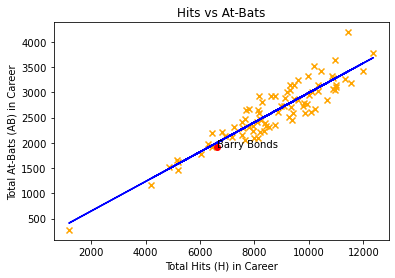

Intercept:  0.2930831443745074  Slope:  61.35761940837945
Barry Bonds Batting Avg:  0.28953330312641595


In [17]:
# batting avg scatterplot
bonds_ab = 0
bonds_h = 0
for i, v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == barry):
        plt.scatter(marker='o', x=v1['AB'], y=v1['H'], c='red')
        plt.annotate('Barry Bonds', (v1['AB'], v1['H']))
        bonds_ab = v1['AB']
        bonds_h = v1['H']
    else:
        plt.scatter(marker='x', x=v1['AB'], y=v1['H'], c='orange')
        
# plt.scatter(x=reg_HOF_stats['H'], y=reg_HOF_stats['AB'])

x = reg_HOF_stats['AB']
y = reg_HOF_stats['H']
m,b = np.polyfit(x,y,1)

#Plots the data onto a scatter plot with regression line
plt.xlabel('Total Hits (H) in Career')
plt.ylabel('Total At-Bats (AB) in Career')
plt.title('Hits vs At-Bats')
plt.plot(x, m*x+b, '-', color='blue')
plt.show()
print("Intercept: ", m, " Slope: ", b)
print("Barry Bonds Batting Avg: ", bonds_h / bonds_ab)

Based off of this, Bonds is right there along with the rest of the hall of famers as far as batting average goes. If we want to take this a step further, we can make a linear regression model using the above statistics to see the residuals. We can do this using sklearn. Residuals are equal to actual hits minus predicted hits for each player.

In [18]:
x = pd.DataFrame(reg_HOF_stats['AB'])
y = reg_HOF_stats['H']

reg = linear_model.LinearRegression().fit(x, y)

print("Coefficient of hitting for contact: ", reg.coef_)

Coefficient of hitting for contact:  [0.29308314]


In [19]:
# calculating residuals
reg_HOF_stats['PredictedHits'] = reg.predict(x)
reg_HOF_stats['ResidualHits'] = reg_HOF_stats['H'] - reg_HOF_stats['PredictedHits']
reg_HOF_stats.sort_values(by='ResidualHits', ascending=False, inplace=True)
reg_HOF_stats.head(10)

,playerID,yearID,vote_pct,POS,G,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB,PredictedHits,ResidualHits
0,cobbty01,1936.0,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0,3413.056458,775.943542
12,hornsro01,1942.0,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,541,169,1038,48.0,135.0,2456.726158,473.273842
6,speaktr01,1937.0,82.089552,OF,2717,6935,462,224.0,3514,10195,117,792,222,1381,103.0,432.0,3049.340276,464.659724
5,lajoina01,1937.0,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,657,163,516,134.0,380.0,2872.024974,370.975026
99,gwynnto01,2007.0,97.614679,OF,2326,4512,160,62.0,3141,9288,135,543,85,790,24.0,319.0,2783.513864,357.486136
38,musiast01,1969.0,93.235294,OF,2907,12439,818,142.0,3630,10972,475,725,177,1599,53.0,78.0,3277.065879,352.934121
11,keelewi01,1939.0,75.547445,3B,2104,3170,363,167.0,2932,8591,33,241,145,524,129.0,495.0,2579.234913,352.765087
10,collied01,1939.0,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,438,187,1499,77.0,741.0,2977.241823,337.758177
36,willite01,1966.0,93.377483,OF,2152,4158,142,113.0,2654,7706,521,525,71,2021,39.0,24.0,2319.856330,334.143670
9,sislege01,1939.0,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,425,164,472,48.0,375.0,2484.275974,327.724026


A violin plot can show how our residuals are distributed. A normal curve shows that it is normally distributed.

Text(0.5, 1.0, 'Residuals of Hits')

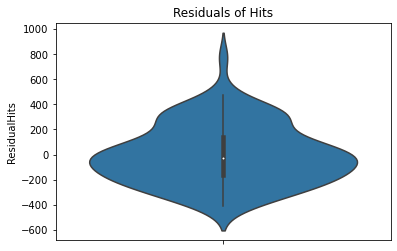

In [20]:
ax = sns.violinplot(y=reg_HOF_stats['ResidualHits'])
ax.set_title("Residuals of Hits")

Text(0.5, 1.0, 'At Bat vs. Residual')

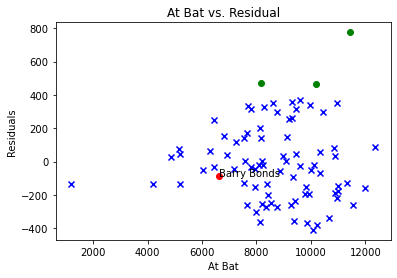

In [21]:
for i, v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == barry):
        plt.scatter(marker='o', x=v1['AB'], y=v1['ResidualHits'], c='red')
        plt.annotate('Barry Bonds',(v1['AB'], v1['ResidualHits']))
    elif (v1['ResidualHits'] > 400):
        #Players that overperformed
        plt.scatter(marker='o', x=v1['AB'], y=v1['ResidualHits'], c='green')
    else:
        #Everyone else
        plt.scatter(marker='x', x=v1['AB'], y=v1['ResidualHits'], c='blue')
plt.xlabel("At Bat")
plt.ylabel("Residuals")
plt.title("At Bat vs. Residual")

Upon plotting the residuals in a scatter plot, we see that Barry Bonds is about as expected. There are certainly players that were better contact hitters than Bonds, and there are a few outliers marked in green, but Bonds is certainly not a bad contact hitter. Relative to other hall of fame players, Barry Bonds is about an average contact hitter.

## Power Hitting

Another tool we can look at is power hitting compared to other hall of famers. We can use a similar method as above and check for ratios as opposed to totals. Power hitting is generally determined by the amount of extra base hits a player has, which include doubles, triples, and home runs. However, our dataframe gives us the number of hits a player has, but not if they scored a double/triple/homerun. They do give us the number of doubles/triples/homeruns they scored, so to calculate the number of singles, we subtract the number of doubles/triples/homeruns from the number of hits. We then take doubles/triples/homeruns and multiply them by 2/3/4 respectively. This will allow us to accurately see which players were the best at hitting for power in the hall of fame.

I want to create a new column for singles and a new column for total bases. Both of which can be derived from the doubles, triples, and home runs columns. Total bases also includes walks so I can also include BB and HBP columns in this calculation.

In [22]:
# Creating a new column called singles (SGL)
reg_HOF_stats['SGL'] = reg_HOF_stats['H'] - reg_HOF_stats['DBL'] - reg_HOF_stats['TPL'] - reg_HOF_stats['HR']

# New column caled total-bases (TB) scored using singles, doubles, triples, homeruns, bb, and hbp
reg_HOF_stats['TB'] = reg_HOF_stats['SGL'] + (2*reg_HOF_stats['DBL']) + (3*reg_HOF_stats['TPL'])+(4*reg_HOF_stats['HR']) + reg_HOF_stats['BB'] + reg_HOF_stats['HBP']

reg_HOF_stats.drop(['SGL','DBL','TPL','BB','HBP'],axis=1,inplace=True)

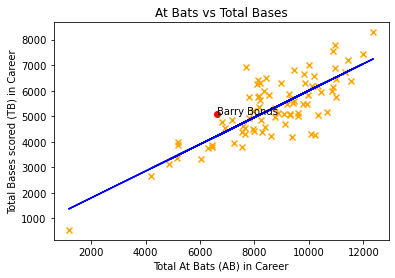

In [23]:
for i, v2 in reg_HOF_stats.iterrows():
    if (v2['playerID'] == barry):
        plt.scatter(marker='o', x=v2['AB'], y=v2['TB'], c='red')
        plt.annotate('Barry Bonds',(v2['AB'],v2['TB']))
    else:
        plt.scatter(marker='x', x=v2['AB'], y=v2['TB'], c='orange')

x = reg_HOF_stats['AB']
y = reg_HOF_stats['TB']
m,b = np.polyfit(x,y,1)

plt.plot(x, m*x+b, '-', color='blue')
plt.xlabel('Total At Bats (AB) in Career')
plt.ylabel('Total Bases scored (TB) in Career')
plt.title('At Bats vs Total Bases')
plt.show()

Upon creation of a scatter plot of total bases vs at bats, it is clear that Barry Bonds was an incredible power hitter. He performed better than what the model predicts and is among the best players ever at power hitting. This shows he was still one of the greatest players and power hitters ever before he even began using steroids.

Next, we want to make a linear model to check the residuals of At-Bat vs. Total Bases.

In [24]:
#Creates a linear regression model using at bat and total bases
x2 = pd.DataFrame(reg_HOF_stats['AB'])
y2 = reg_HOF_stats['TB']

regBases = linear_model.LinearRegression().fit(x2,y2)
print("Coefficient of linear model: ", regBases.coef_[0], " Intercept of linear model: ", regBases.intercept_)

Coefficient of linear model:  0.5249853594475014  Intercept of linear model:  756.0533103918351


In [25]:
# residual bases
reg_HOF_stats['PredictedBases'] = regBases.predict(x2)
reg_HOF_stats['ResidualBases'] = reg_HOF_stats['TB'] - reg_HOF_stats['PredictedBases']
reg_HOF_stats.head(10)

,playerID,yearID,vote_pct,POS,G,PO,A,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases
0,cobbty01,1936.0,98.230088,OF,2954,6507,410,278.0,4189,11436,117,896.0,3413.056458,775.943542,7197.0,6759.785881,437.214119
12,hornsro01,1942.0,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,135.0,2456.726158,473.273842,5798.0,5046.758653,751.241347
6,speaktr01,1937.0,82.089552,OF,2717,6935,462,224.0,3514,10195,117,432.0,3049.340276,464.659724,6585.0,6108.279050,476.720950
5,lajoina01,1937.0,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,380.0,2872.024974,370.975026,5122.0,5790.662907,-668.662907
99,gwynnto01,2007.0,97.614679,OF,2326,4512,160,62.0,3141,9288,135,319.0,2783.513864,357.486136,5073.0,5632.117329,-559.117329
38,musiast01,1969.0,93.235294,OF,2907,12439,818,142.0,3630,10972,475,78.0,3277.065879,352.934121,7786.0,6516.192674,1269.807326
11,keelewi01,1939.0,75.547445,3B,2104,3170,363,167.0,2932,8591,33,495.0,2579.234913,352.765087,4215.0,5266.202533,-1051.202533
10,collied01,1939.0,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,741.0,2977.241823,337.758177,5844.0,5979.132652,-135.132652
36,willite01,1966.0,93.377483,OF,2152,4158,142,113.0,2654,7706,521,24.0,2319.856330,334.143670,6944.0,4801.590490,2142.409510
9,sislege01,1939.0,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,375.0,2484.275974,327.724026,4391.0,5096.107277,-705.107277


Text(0.5, 1.0, 'Residuals of Bases')

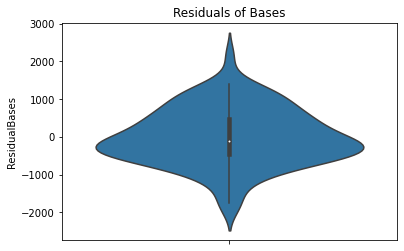

In [26]:
ax = sns.violinplot(y=reg_HOF_stats['ResidualBases'])
ax.set_title("Residuals of Bases")

Text(0, 0.5, 'Residual Bases')

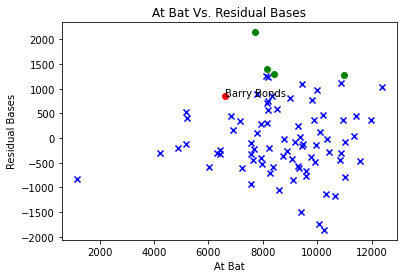

In [27]:
for i, v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == barry):
        plt.scatter(marker='o', x=v1['AB'], y=v1['ResidualBases'], c='red')
        plt.annotate('Barry Bonds',(v1['AB'], v1['ResidualBases']))
    # Overperformers
    elif (v1['ResidualBases'] > 1250):
        plt.scatter(marker='o', x=v1['AB'], y=v1['ResidualBases'], c='green')
    else:
        plt.scatter(marker='x', x=v1['AB'], y=v1['ResidualBases'], c='blue')
plt.title("At Bat Vs. Residual Bases")
plt.xlabel("At Bat")
plt.ylabel("Residual Bases")

In [28]:
for i,r in reg_HOF_stats.iterrows():
    if r['playerID'] == barry:
        print("Bonds' total hits residual was " +str(r['ResidualHits']) +" and his total bases residual was " +str(r['ResidualBases']))

Bonds' total hits residual was -84.86111831199378 and his total bases residual was 854.0186247062584


Barry Bonds' power hitting is arguably one of the best in the dataset, and the dataset is full of quite literally the greatest baseball players of all time. This translates as saying then that Barry Bonds, before using steroids, is one of the greatest power hitters of all time. His total bases residual is a staggering 854 above the expected total bases, which is simply obnoxious how good that is. Bonds is far above the regression line, and while there are a few players who are well above Barry Bonds in terms of power hitting, Bonds is better than the majority of current hall of famers. While this can partially be attributed to the low amount of at bats in his career compared to other hall of famers, even if he regressed in his second half of his career in a world where he theoretically was not using steroids, I can't imagine he regresses to the point where he would fall too far down the chart of all time power hitters. Even if he regressed to the mean, that would still make him a surefire selection for the hall of fame if he since the mean he will regress to is the mean of hall of famers, which is not any ordinary set of players. 

## Fielding

Another way to compare Bonds to the field of hall of famers is by comparing their fielding stats. Due to the difference in playmaking opportunities between infielders and outfielders, I will only compare Bonds with other outfielders since Bonds played in the outfield his entire career. To do this, I first filter out any player that did not play in the outfield, then I calculate the total outs that each Hall of Famer was responsible for by combining each player's putouts (outs he was physically responsible for) with assists (times he aided in getting the out). We also create another column for fielding percentage, which represents the percentage of times a player recorded an out when he was given a chance (Outs/Outs+Errors).

In [29]:
reg_HOF_stats['OUTS'] = reg_HOF_stats['PO'] + reg_HOF_stats['A']
reg_HOF_stats['FieldPer'] = reg_HOF_stats['OUTS'] / (reg_HOF_stats['OUTS'] + reg_HOF_stats['E']) * 100
# reg_HOF_stats.drop(['PO','A'],axis=1,inplace=True)

reg_HOF_stats = reg_HOF_stats.loc[reg_HOF_stats['POS'] == 'OF']
reg_HOF_stats.head(10)

,playerID,yearID,vote_pct,POS,G,PO,A,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer
0,cobbty01,1936.0,98.230088,OF,2954,6507,410,278.0,4189,11436,117,896.0,3413.056458,775.943542,7197.0,6759.785881,437.214119,6917,96.136206
6,speaktr01,1937.0,82.089552,OF,2717,6935,462,224.0,3514,10195,117,432.0,3049.340276,464.659724,6585.0,6108.279050,476.720950,7397,97.060753
99,gwynnto01,2007.0,97.614679,OF,2326,4512,160,62.0,3141,9288,135,319.0,2783.513864,357.486136,5073.0,5632.117329,-559.117329,4672,98.690325
38,musiast01,1969.0,93.235294,OF,2907,12439,818,142.0,3630,10972,475,78.0,3277.065879,352.934121,7786.0,6516.192674,1269.807326,13257,98.940219
36,willite01,1966.0,93.377483,OF,2152,4158,142,113.0,2654,7706,521,24.0,2319.856330,334.143670,6944.0,4801.590490,2142.409510,4300,97.439384
22,wanerpa01,1952.0,83.333333,OF,2361,5513,270,144.0,3152,9459,113,104.0,2833.631082,318.368918,5607.0,5721.889825,-114.889825,5783,97.570440
24,simmoal01,1953.0,75.378788,OF,2143,5000,169,94.0,2927,8759,307,88.0,2628.472881,298.527119,5330.0,5354.400074,-24.400074,5169,98.213946
37,medwijo01,1968.0,84.805654,OF,1871,4152,143,86.0,2471,7635,205,42.0,2299.047427,171.952573,4315.0,4764.316530,-449.316530,4295,98.036978
28,dimagjo01,1955.0,88.844622,OF,1722,4529,153,105.0,2214,6821,361,30.0,2060.477747,153.522253,4784.0,4336.978447,447.021553,4682,97.806559
120,guerrvl01,2018.0,92.890995,OF,1608,3169,126,125.0,2590,8155,449,181.0,2451.450662,138.549338,5346.0,5037.308917,308.691083,3295,96.345029


In [30]:
reg_HOF_stats

,playerID,yearID,vote_pct,POS,G,PO,A,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer
0,cobbty01,1936.0,98.230088,OF,2954,6507,410,278.0,4189,11436,117,896.0,3413.056458,775.943542,7197.0,6759.785881,437.214119,6917,96.136206
6,speaktr01,1937.0,82.089552,OF,2717,6935,462,224.0,3514,10195,117,432.0,3049.340276,464.659724,6585.0,6108.279050,476.720950,7397,97.060753
99,gwynnto01,2007.0,97.614679,OF,2326,4512,160,62.0,3141,9288,135,319.0,2783.513864,357.486136,5073.0,5632.117329,-559.117329,4672,98.690325
38,musiast01,1969.0,93.235294,OF,2907,12439,818,142.0,3630,10972,475,78.0,3277.065879,352.934121,7786.0,6516.192674,1269.807326,13257,98.940219
36,willite01,1966.0,93.377483,OF,2152,4158,142,113.0,2654,7706,521,24.0,2319.856330,334.143670,6944.0,4801.590490,2142.409510,4300,97.439384
22,wanerpa01,1952.0,83.333333,OF,2361,5513,270,144.0,3152,9459,113,104.0,2833.631082,318.368918,5607.0,5721.889825,-114.889825,5783,97.570440
24,simmoal01,1953.0,75.378788,OF,2143,5000,169,94.0,2927,8759,307,88.0,2628.472881,298.527119,5330.0,5354.400074,-24.400074,5169,98.213946
37,medwijo01,1968.0,84.805654,OF,1871,4152,143,86.0,2471,7635,205,42.0,2299.047427,171.952573,4315.0,4764.316530,-449.316530,4295,98.036978
28,dimagjo01,1955.0,88.844622,OF,1722,4529,153,105.0,2214,6821,361,30.0,2060.477747,153.522253,4784.0,4336.978447,447.021553,4682,97.806559
120,guerrvl01,2018.0,92.890995,OF,1608,3169,126,125.0,2590,8155,449,181.0,2451.450662,138.549338,5346.0,5037.308917,308.691083,3295,96.345029


Slope:  3.6180831101438407  Intercept:  -2329.300181482587


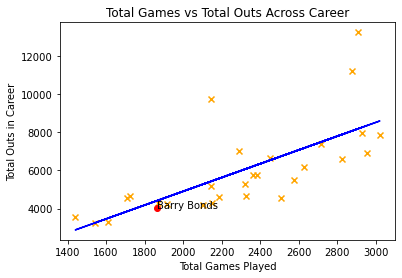

In [31]:
for i, v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == barry):
        plt.scatter(marker='o', x=v1['G'], y=v1['OUTS'], c='red')
        plt.annotate('Barry Bonds',(v1['G'],v1['OUTS']))
    else:
        plt.scatter(marker='x', x=v1['G'], y=v1['OUTS'], c='orange')

x = reg_HOF_stats.loc[reg_HOF_stats['playerID'] != barry]['G']
y = reg_HOF_stats.loc[reg_HOF_stats['playerID'] != barry]['OUTS']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')
plt.xlabel('Total Games Played')
plt.ylabel('Total Outs in Career')
plt.title('Total Games vs Total Outs Across Career')

print("Slope: ",m, " Intercept: ",b)

The results of the figure show that among other hall of fame outfielders, Bonds is right up there in terms of producing solid defense. He got about as many outs on average as the majority of others, if not better than many as well. He falls a bit below the regression line but his residual distance shows he is about average compared to hall of famers.

As a next step to this analysis, we can see if there is a relationship between the total outs and games played. To confirm if there is a linear relationship, I can use the statsmodel library to obtain a p value of the model, as well as confirm if the creation of a linear model shows a linear relationship.

In [32]:
x = pd.DataFrame(reg_HOF_stats['G'])
y = reg_HOF_stats['OUTS']
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

reg_HOF_stats['PredictedOuts'] = model.predict(X)

reg_HOF_stats['ResidualOuts'] = reg_HOF_stats['OUTS'] - reg_HOF_stats['PredictedOuts']
reg_HOF_stats.sort_values(by='ResidualOuts', ascending=False, inplace=True)
reg_HOF_stats.head()

/var/folders/z2/qm85spt10bb5xdxr4s__lq280000gn/T/ipykernel_85453/830696441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_HOF_stats['PredictedOuts'] = model.predict(X)
/var/folders/z2/qm85spt10bb5xdxr4s__lq280000gn/T/ipykernel_85453/830696441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_HOF_stats['ResidualOuts'] = reg_HOF_stats['OUTS'] - reg_HOF_stats['PredictedOuts']
/Users/adas/opt/miniconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value i

,playerID,yearID,vote_pct,POS,G,PO,A,E,H,AB,...,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer,PredictedOuts,ResidualOuts
38,musiast01,1969.0,93.235294,OF,2907,12439,818,142.0,3630,10972,...,78.0,3277.065879,352.934121,7786.0,6516.192674,1269.807326,13257,98.940219,8192.510764,5064.489236
68,stargwi01,1988.0,82.435597,OF,2144,9278,486,151.0,2232,7927,...,17.0,2384.627705,-152.627705,5205.0,4917.612255,287.387745,9764,98.477055,5410.223066,4353.776934
70,yastrca01,1989.0,94.630872,OF,2874,10437,775,135.0,3419,11988,...,168.0,3574.838354,-155.838354,7424.0,7049.577799,374.422201,11212,98.810258,8072.175909,3139.824091
45,mantlmi01,1974.0,88.219178,OF,2290,6734,290,107.0,2415,8102,...,153.0,2435.917255,-20.917255,6257.0,5009.484693,1247.515307,7024,98.499509,5942.613634,1081.386366
28,dimagjo01,1955.0,88.844622,OF,1722,4529,153,105.0,2214,6821,...,30.0,2060.477747,153.522253,4784.0,4336.978447,447.021553,4682,97.806559,3871.395531,810.604469


In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   OUTS   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     27.58
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.55e-05
Time:                        23:45:53   Log-Likelihood:                -255.52
No. Observations:                  29   AIC:                             515.0
Df Residuals:                      27   BIC:                             517.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2407.8960   1621.899     -1.485      0.149   -5735.757     919.965
G              3.6465      0.694      5.251      0.000       2.222       5.071
==============================================================================
Omnibus:                       19.562   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.268
Skew:                           1.761   Prob(JB):                     5.37e-06
Kurtosis:                       5.770   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We got a p-value of 0, so we can reject the null hypothesis and there conclude there is no relationship  between outs and games played. I can make a violin plot to check the distribution of the data.

<AxesSubplot:title={'center':'Distribution of Residual Outs'}, ylabel='ResidualOuts'>

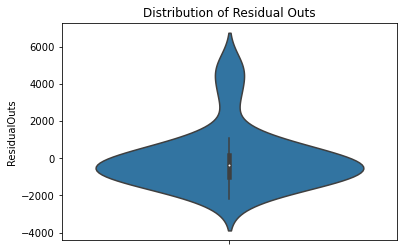

In [34]:
ax = sns.violinplot(y=reg_HOF_stats['ResidualOuts'])
ax.set_title("Distribution of Residual Outs")
ax

The data is not very normally distributed like the previous two violin plots were. This can be due to some players in certain era seeing more opportunities for making plays, which could explain the outliers we saw in the scatter plot. This explains why there is a skew to the left, and why most of the players performed worse than expected.

## Speed

The last tool I want to look at is speed. I personally do not think speed is the most important tool and does not hold 
as much importance as fielding and hitting do, but it is one of the aspects of the game and deserves recognition. Statistically, it is a bit difficult to measure speed, but comparing stolen bases is a good way to measure this. Similar to arm strength, fielding is also a tool that involved speed.

In [35]:
# reset the hof table and bring back the infielders
reg_HOF_stats = df_copy
reg_HOF_stats

,playerID,yearID,vote_pct,POS,G,PO,A,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer
0,cobbty01,1936.0,98.230088,OF,2954,6507,410,278.0,4189,11436,117,896.0,3413.056458,775.943542,7197.0,6759.785881,437.214119,6917,96.136206
12,hornsro01,1942.0,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,135.0,2456.726158,473.273842,5798.0,5046.758653,751.241347,11337,95.775957
6,speaktr01,1937.0,82.089552,OF,2717,6935,462,224.0,3514,10195,117,432.0,3049.340276,464.659724,6585.0,6108.279050,476.720950,7397,97.060753
5,lajoina01,1937.0,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,380.0,2872.024974,370.975026,5122.0,5790.662907,-668.662907,15211,96.706720
99,gwynnto01,2007.0,97.614679,OF,2326,4512,160,62.0,3141,9288,135,319.0,2783.513864,357.486136,5073.0,5632.117329,-559.117329,4672,98.690325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,smithoz01,2002.0,91.737288,SS,2511,4249,8375,281.0,2460,9396,28,580.0,2815.166844,-355.166844,4189.0,5688.815748,-1499.815748,12624,97.822549
61,killeha01,1984.0,83.126551,2B,2241,8849,1963,215.0,2086,8147,573,19.0,2449.105997,-363.105997,5750.0,5033.109034,716.890966,10812,98.050240
78,jacksre01,1993.0,93.617021,OF,2102,4062,133,142.0,2584,9864,563,228.0,2952.329756,-368.329756,6305.0,5934.508896,370.491104,4195,96.725847
60,aparilu01,1984.0,84.615385,SS,2583,4548,8016,366.0,2677,10230,83,506.0,3059.598186,-382.598186,4267.0,6126.653538,-1859.653538,12564,97.169374


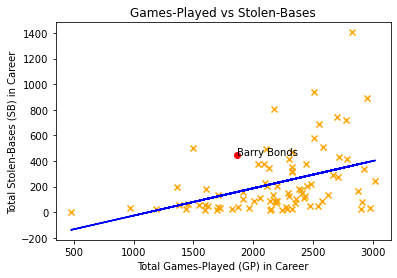

Slope 0.21353653118402532  Intercept  -240.3636780653499


In [36]:
reg_HOF_stats = df_copy

for i, v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == barry):
        plt.scatter(marker='o', x=v1['G'], y=v1['SB'], c='red')
        plt.annotate('Barry Bonds', (v1['G'], v1['SB']))
    else:
        plt.scatter(marker='x', x=v1['G'], y=v1['SB'], c='orange')

x = reg_HOF_stats.loc[reg_HOF_stats['playerID'] != barry]['G']
y = reg_HOF_stats.loc[reg_HOF_stats['playerID'] != barry]['SB']
m,b = np.polyfit(x,y,1)

plt.xlabel('Total Games-Played (GP) in Career')
plt.ylabel('Total Stolen-Bases (SB) in Career')
plt.title('Games-Played vs Stolen-Bases')
plt.plot(x, m*x+b, '-', color='blue')
plt.show()
print("Slope", m, " Intercept ", b)

The plot shows Barry Bonds was one of the best at stealing bases of all time. Given that he is that much higher than the regression line, it shows that Bonds certainly has some speed as well as skill when it comes to stealing bases.

In [37]:
reg_HOF_stats['PredictedStolen'] = m * reg_HOF_stats['G'] + b
reg_HOF_stats['ResidualStolen'] = reg_HOF_stats['SB'] - reg_HOF_stats['PredictedStolen']
reg_HOF_stats.sort_values(by='ResidualStolen', ascending=False, inplace=True)
reg_HOF_stats.head()

,playerID,yearID,vote_pct,POS,G,PO,A,E,H,AB,...,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer,PredictedStolen,ResidualStolen
101,henderi01,2009.0,94.805195,OF,2826,6468,131,141.0,3055,10961,...,1406.0,3273.841965,-218.841965,6876.0,6510.417835,365.582165,6599,97.908012,363.090559,1042.909441
64,brocklo01,1985.0,79.746835,OF,2507,4394,142,196.0,3023,10332,...,938.0,3089.492667,-66.492667,5048.0,6180.202044,-1132.202044,4536,95.857988,294.972406,643.027594
117,raineti01,2017.0,85.972851,2B,2176,4284,273,61.0,2605,8872,...,808.0,2661.591276,-56.591276,5143.0,5413.723419,-270.723419,4557,98.679082,224.291814,583.708186
0,cobbty01,1936.0,98.230088,OF,2954,6507,410,278.0,4189,11436,...,896.0,3413.056458,775.943542,7197.0,6759.785881,437.214119,6917,96.136206,390.423235,505.576765
93,molitpa01,2004.0,85.177866,2B,1495,3506,3241,208.0,3319,10835,...,504.0,3236.913489,82.086511,5995.0,6444.269680,-449.269680,6747,97.009346,78.873436,425.126564


Text(0.5, 1.0, 'Residuals of Stolen Bases')

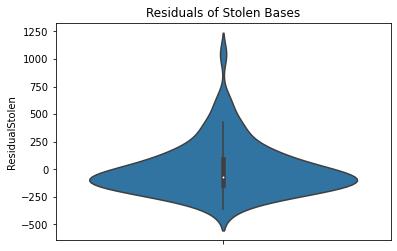

In [38]:
ax = sns.violinplot(y=reg_HOF_stats['ResidualStolen'])
ax.set_title("Residuals of Stolen Bases")

The plot shows that the residuals are normally distributed, which makes sense and proves that evaluating this metric with linear regression was a good choice.

## Takeaways

After analyzing and comparing Barry Bonds to other current hall of famers with four of the most important tools that make up any baseball player, it is obvious that the results put him up there as a qualified candidate for the National Baseball Hall of Fame. Bonds has exceptional statistics to support a bid for the hall of fame and his work on the field is excellent support for it. He out-performs other hall of famers by a wide margin in power hitting and in speed, and performs as well as the rest of the hall of famers in contact hitting and in fielding. 

For contact hitting, I determined the batting average of everyone in the dataset, plotted everyone on a scatter plot, and ran a regression line and found that Bonds is about average. 

With power hitting, I created a new column in our dataframe called total bases which rewarded bigger hits (Ex. HR is more valuable than double). I saw that Barry Bonds significantly out performed other hall of famers. Simply put, Barry Bonds was one of the best at hitting the ball really far consistently, even without steroids. I used the same analysis methods I used for contact hitting evaluation here too. 

For fielding, I made a new column for total out a player was responsible for and plotted that. I found that infielders and outfielders have numbers that you can not really compare so I excluded infielders from this dataset. There were a small amount of outfielders in this dataset, and there were a few that were outliers, far exceeding the mean. Most of the players were clustered together, Bonds among them. The outliers may have been where they were because either the game was different in their era, or they may have even switched positions from infield to outfield, which can skew numbers. In summary, this analysis showed us Bonds was a good fielder that performed about as well as other hall of famers.

Finally, I thought measuring speed was possible through evaluating stolen bases and baserunning as a whole. Upon creating plots similar to the previous categories, it was apparent that Bonds was one of the greatest baserunners ever, at least among the hall of famers. He far exceeded the expected number and outperformed much of the field, similar to how he outperformed much of the field in power hitting. 

Quantifiably, Barry Bonds before using steroids was on well on his way to becoming a surefire future hall of fame player, and his career up until that point can certainly make a case for having a place in the hall of fame.

# Conclusion

Barry Bonds will go down as one of the greatest baseball players of all time. The trajectory of Bonds' career had he not used steroids is possibly one of the biggest mysteries in sports, but most fans and players agree that he certainly would have earned a place in the National Baseball Hall of Fame. Unfortunately, his steroid use has ultimately tainted his career and most of his accolades, but I believe the hall of fame voters failed to understand that even before he used steroids, Bonds was already a hall of famer.

Through the application of the Data Science Pipeline, I hope it is evident why Barry Bonds deserves a place in the National Baseball Hall of Fame. Bonds' pre-juice career alone absolutely has a case to make the MLB Hall of Fame, and had he even produced at a fraction of the rate of his juiced and steroid-filled latter half of his career, he easily would have made it in. 

Outside of the statistics, Bonds was known to have not been the best teammate and not the best clubhouse guy. He also had a dicy relationship with the media and with fans.

The statistics through each facet of baseball do not tell the full story of Barry Bonds, but the stats do say a lot. It says that he was one of the best players ever and he was not elected to the National Baseball Hall of Fame for reasons outside of his production on the field.

# Resources

## Definitions

playerID: Player ID code.

yearID: Year (In the Hall of Fame table, it is the year the player was inducted).

Pos: Position (Ex. OF == Outfield).

G: Games played. A player is credited with playing a game if they enter a game at any point, and do not need to start or have an at-bat to still play a game. 

PO: Putouts. When the fielder physically records the act of completing an out -- whether it be by stepping on the base for a forceout, tagging a runner, catching a batted ball, or catching a third strike.

A: Assists. A fielder who touches the ball before a putout is recorded by another fielder.

E: Errors. A fielder obtains an error if he fails to convert an out on a play a fielder can routinely make. (Ex. dropping a flyball, overthrowing somebody to record an out, or missing the tag on a baserunner).

AB: At Bats. A player is credited with an at bat when the batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice. They are not credited with an at bat when they reach base on balls or hit by pitch.

H: When a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice.

2B: Doubles. When a batter hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner.

3B: Triples. When a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner.

HR: Homeruns. A home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.

RBI: Runs Batted In. Where the result of his plate appearance is a run being scored. There are a few exceptions, however. A player does not receive an RBI when the run scores as a result of an error or ground into double play.

SB: Stolen Bases. When a baserunner advances by taking a base to which he isn't entitled

BB: Base on Balls. A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter.

HBP: Hit by pitch. A batter is struck by a pitched ball without swinging at it. He is awarded first base as a result.

OPS: On-base Plus Slugging. OPS adds on-base percentage and slugging percentage to get one number that unites the two. It's meant to combine how well a hitter can reach base, with how well he can hit for average and for power.

OBP: On-base Percentage. How frequently a batter reaches base per plate appearance. Times on base include hits, walks and hit-by-pitches, but do not include errors, times reached on a fielder's choice or a dropped third strike. 

AVG: Batting Average. Batting average is determined by dividing a player's hits by his total at-bats for a number between zero (shown as .000) and one (1.000). While batting average is a useful tool for measuring a player's ability at the plate, it isn't all-encompassing. For instance, batting average doesn't take into account the number of times a batter reaches base via walks or hit-by-pitches. 

Source: https://www.mlb.com/glossary

https://www.seanlahman.com/files/database/readme2021.txt

## Articles

https://www.nytimes.com/2006/03/23/books/barry-bonds-and-baseballs-steroids-scandal.html
    
https://www.espn.com/mlb/news/story?id=3113127

https://www.mlb.com/news/barry-bonds-falls-short-of-hall-of-fame-on-writers-ballot

## Other

***Game of Shadows*** by Mark Fainaru-Wada and Lance Williams

https://www.amazon.com/Game-Shadows-Steroids-Scandal-Professional/dp/1592402682

**Lahman's Baseball Database** - Dataset provider. One of the best sources of baseball data available.

https://www.seanlahman.com/baseball-archive/statistics/

**Baseball-Reference** - Alternative Dataset provider. Requires a bit more effort to get what you want but also has excellent baseball data available.

https://www.baseball-reference.com/



<center><img src="IMG_5702.jpg"/></center>